SP02 Project

1. Reading image

In [23]:
import cv2 as cv
import numpy as np
import mahotas as mh
import mahotas.demos
import matplotlib.pyplot as plt

In [15]:
def dis_pic(pic_name):
    cv.imshow('image',pic_name)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [4]:
data_pic = cv.imread("./DATA/98_spo2.jpg")
dis_pic(data_pic)

Here taking Mean of Red and Blue

In [5]:
red_img = data_pic[:, 0, 0]
blue_img = data_pic[0,0,:]

In [6]:
# Display Red and Blue image

In [7]:
dis_pic(red_img)
# dis_pic(blue_img)

Mean Value of Red and Blue Image

In [8]:
red_mean  = red_img.mean()
blue_mean = blue_img.mean() 
print("Red Mean: ",red_mean)
print("Blue Mean: ",blue_mean)

Red Mean:  72.060546875
Blue Mean:  107.66666666666667


DC Component

In [9]:
sd_red = cv.meanStdDev(red_img)
sd_blue = cv.meanStdDev(blue_img)
print("Red SD: ",sd_red[1][0][0])
print("Blue SD: ",sd_blue[1][0][0])

Red SD:  7.350449181726886
Blue SD:  104.0843674888576


(ACr / DCr)/(ACb / DCb)

In [10]:
K1 = (red_mean / sd_red[1][0][0])
K2 = (blue_mean/ sd_blue[1][0][0])

K3 = K1/K2

# print("K1 - > ",K3[0])
print("K3 -> ",K3)

K3 ->  9.477371704921833


Video to Frames

In [11]:
def FrameCapture(path):
    vidObj = cv.VideoCapture(path)
    count = 0
    success = 1
    while success:
        success, image = vidObj.read()
  
        # Saves the frames with frame-count
        cv.imwrite("./Frames/frame%d.jpg" % count, image)
  
        count += 1

In [12]:
FrameCapture('./Data/SOP2_98.mp4')

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


Loop through Frames

In [13]:
def cal_K3(img):
    #1 
    red_img = img[:, 0, 0]
    blue_img = img[0,0,:]
    

    
    #2
    red_mean  = red_img.mean()
    blue_mean = blue_img.mean() 
    
    
#     print("Red Mean: ",red_mean)
#     print("Blue Mean: ",blue_mean)
    
    #3
    sd_red = cv.meanStdDev(red_img)
    sd_blue = cv.meanStdDev(blue_img)
    
    #4
    K1 = (red_mean / sd_red[1][0][0])
    K2 = (blue_mean/ sd_blue[1][0][0])

    K3 = K1/K2

    
    return K3
    
    
    
    

In [16]:
img = cv.imread('./Frames/frame'+str(1)+'.jpg')
# dis_pic(img)
cal_K3(img)

10.556155344171822

In [9]:
c = 0
str(c)
c = c + 1
print(c)

1


In [17]:
intensity_red  = list()
success = 1
c = 0
while success:
    try:
        img = cv.imread('./Frames/frame'+str(c)+'.jpg')
        K3_in = cal_K3(img)
        print(K3_in,"Frames : ",c)
        intensity_red.append(K3_in)
        c = c + 1
    except:
        print("e")
        success = 0
        break
    
    

12.3441087151458 Frames :  0
10.556155344171822 Frames :  1
10.60445331197566 Frames :  2
11.682575055098043 Frames :  3
11.630430664919777 Frames :  4
12.010511854908453 Frames :  5
11.927502290764123 Frames :  6
11.887259674187437 Frames :  7
12.453506521218344 Frames :  8
13.477960793903355 Frames :  9
12.350302172124987 Frames :  10
12.054961643794284 Frames :  11
12.979754626609436 Frames :  12
13.138716951339998 Frames :  13
11.59148694263538 Frames :  14
12.57277744848966 Frames :  15
11.925853135555363 Frames :  16
12.798766359609477 Frames :  17
12.703366920196803 Frames :  18
10.917663801211727 Frames :  19
12.10283880936243 Frames :  20
11.681353020310688 Frames :  21
12.097503454726287 Frames :  22
12.809340447170198 Frames :  23
11.732075517646793 Frames :  24
11.282478835010073 Frames :  25
13.426833819198762 Frames :  26
12.317936501792822 Frames :  27
10.095037513134239 Frames :  28
10.785545534387023 Frames :  29
11.073949614113006 Frames :  30
12.143542528289483 Frame

11.44095830689066 Frames :  258
11.11914441384849 Frames :  259
11.879432995361707 Frames :  260
12.170730654564833 Frames :  261
11.97088662575609 Frames :  262
11.925649394267312 Frames :  263
13.672926227497804 Frames :  264
13.580961309163111 Frames :  265
11.888435421259441 Frames :  266
10.447584357394826 Frames :  267
10.719298125945485 Frames :  268
11.063020730911031 Frames :  269
10.881196973551177 Frames :  270
10.628064399342456 Frames :  271
11.097170155838961 Frames :  272
11.582840240056726 Frames :  273
12.450194718232918 Frames :  274
13.411610834939825 Frames :  275
12.821535336251607 Frames :  276
12.20285914618807 Frames :  277
13.483570181503685 Frames :  278
12.932460401570532 Frames :  279
13.171648200864247 Frames :  280
10.667100523969712 Frames :  281
10.660834152607773 Frames :  282
11.777601918988031 Frames :  283
12.652567729906213 Frames :  284
12.464073509657608 Frames :  285
12.531401026360106 Frames :  286
11.934711450132054 Frames :  287
12.62985648041

10.722003997701298 Frames :  517
13.097276062385959 Frames :  518
13.145518859774176 Frames :  519
11.408368687227597 Frames :  520
10.789057338482312 Frames :  521
13.142673365653465 Frames :  522
11.971366913055522 Frames :  523
13.000723049173422 Frames :  524
12.574078472334229 Frames :  525
14.094685488440408 Frames :  526
12.04001945731948 Frames :  527
11.674978909926782 Frames :  528
11.82041273226154 Frames :  529
12.784738283346863 Frames :  530
12.085135882533118 Frames :  531
11.881208886422916 Frames :  532
12.88286778889781 Frames :  533
12.42825066641231 Frames :  534
11.945015830483657 Frames :  535
11.95439825459993 Frames :  536
12.991149734529905 Frames :  537
11.45555915782889 Frames :  538
12.09006320151131 Frames :  539
11.147995598083813 Frames :  540
13.132407519811473 Frames :  541
11.0864471297903 Frames :  542
11.259414186905369 Frames :  543
12.209832508292884 Frames :  544
11.318451160902466 Frames :  545
12.39035322936385 Frames :  546
11.76098351493902 Fr

In [32]:
def find_peak(red_img):
    sd_red_instance =  cv.meanStdDev(red_img)
    return sd_red_instance[1][0][0]
    

e
[5.5925587085174975, 5.348949964382568, 5.365744455842192, 5.380846993756555, 5.376258968816525, 5.34534288332494, 5.412937532057889, 5.365056158117343, 5.353716024768739, 5.363811549959147, 5.383031779719891, 5.358508753387318, 5.2571290252588705, 5.397594496481058, 5.457495171579034, 5.440253988457583, 5.4646450519663565, 5.432273337534493, 5.388688265975714, 5.403105046148587, 5.494392482329586, 5.409665171504649, 5.4705707798604974, 5.483033889102074, 5.503520129217609, 5.493641469928161, 5.456735438007873, 5.572620970481815, 5.536167173844397, 5.615775523722628, 5.603929797689414, 5.606000881038184, 5.616961526095369, 5.563224620400596, 5.484890067621556, 5.290854036970819, 5.313877252301229, 5.289845004231317, 5.32551318060086, 5.49150517715982, 5.5716302244262845, 5.612925937836332, 5.660482538534925, 5.640704224153383, 5.682878177770408, 5.727501157577882, 5.701113803725391, 5.608236668606476, 5.684655133438751, 5.572940056955936, 5.583824005816808, 5.58433133929347, 5.615571

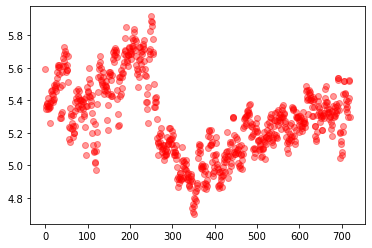

In [35]:
intensity_red_heart  = list()
no_frames = list()
success = 1
c = 0
while success:
    try:
        img = cv.imread('./Frames/frame'+str(c)+'.jpg')
        peaks = find_peak(img)
        intensity_red_heart.append(peaks)
        no_frames.append(c)
        c = c + 1
    except:
        print("e")
        success = 0
        break

print(intensity_red_heart)       
print(no_frames)  

# plt.plot(no_frames,intensity_red_heart, lw=0.4, alpha=0.4 )
# # plt.plot(no_frames[index],intensity_red_heart[index], marker="o", ls="", ms=3 )

# plt.show()
        
plt.plot(no_frames,intensity_red_heart, 'ro',lw=0.4, alpha=0.4)
plt.show()
    

In [18]:
# print((sum(intensity_red)/len(intensity_red)))

[12.3441087151458, 10.556155344171822, 10.60445331197566, 11.682575055098043, 11.630430664919777, 12.010511854908453, 11.927502290764123, 11.887259674187437, 12.453506521218344, 13.477960793903355, 12.350302172124987, 12.054961643794284, 12.979754626609436, 13.138716951339998, 11.59148694263538, 12.57277744848966, 11.925853135555363, 12.798766359609477, 12.703366920196803, 10.917663801211727, 12.10283880936243, 11.681353020310688, 12.097503454726287, 12.809340447170198, 11.732075517646793, 11.282478835010073, 13.426833819198762, 12.317936501792822, 10.095037513134239, 10.785545534387023, 11.073949614113006, 12.143542528289483, 11.950197571704933, 11.498643204125262, 11.064591433777005, 11.130765853721838, 10.6213055999823, 11.11477115094642, 11.95616231897631, 12.378211831488496, 12.419582710187981, 12.487899048407703, 12.732482018531401, 10.929624959429898, 10.701524404855054, 11.271824878694815, 10.96980245754398, 12.280693123724195, 12.629246644500277, 11.497715785015673, 11.5152869

2. Reading dimentions

In [268]:
data_pic_red = data_pic[:,:,1]
# dis_pic(data_pic_red)
filtered_pic = max_rgb_filter(data_pic)
# cv.imshow("Images", np.hstack([data_pic, f]))
# cv.waitKey(0)

In [269]:
def max_rgb_filter(image):
    (B, G, R) = cv.split(image)
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0

    return cv.merge([B, G, R])

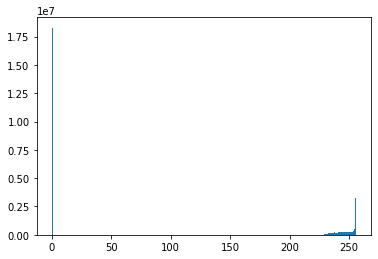

In [270]:
import matplotlib.pyplot as plt
plt.hist(filtered_pic.ravel(),256,[0,256]); plt.show()

In [271]:
bgr_planes = cv.split(data_pic)
print(bgr_planes)

[array([[84, 81, 80, ..., 40, 38, 35],
       [84, 81, 81, ..., 42, 44, 45],
       [82, 82, 84, ..., 34, 31, 31],
       ...,
       [83, 83, 81, ..., 37, 39, 40],
       [79, 83, 85, ..., 37, 39, 39],
       [77, 83, 86, ..., 36, 38, 37]], dtype=uint8), array([[ 4,  1,  0, ...,  4,  5,  2],
       [ 4,  1,  1, ...,  6, 11, 12],
       [ 2,  2,  4, ...,  0,  0,  0],
       ...,
       [ 3,  3,  1, ...,  0,  1,  2],
       [ 0,  3,  5, ...,  0,  1,  1],
       [ 0,  3,  6, ...,  0,  0,  0]], dtype=uint8), array([[255, 254, 253, ..., 228, 226, 223],
       [255, 254, 254, ..., 230, 232, 233],
       [255, 255, 255, ..., 222, 219, 219],
       ...,
       [255, 255, 255, ..., 229, 231, 232],
       [254, 255, 255, ..., 229, 231, 231],
       [252, 255, 255, ..., 228, 230, 229]], dtype=uint8)]


In [272]:
def dim(bgr_planes):
    if not type(bgr_planes) == list:
        return []
    return [len(bgr_planes)] + dim(bgr_planes[0])
dim(bgr_planes)

[3]

In [273]:
bgr_planes[0]

array([[84, 81, 80, ..., 40, 38, 35],
       [84, 81, 81, ..., 42, 44, 45],
       [82, 82, 84, ..., 34, 31, 31],
       ...,
       [83, 83, 81, ..., 37, 39, 40],
       [79, 83, 85, ..., 37, 39, 39],
       [77, 83, 86, ..., 36, 38, 37]], dtype=uint8)

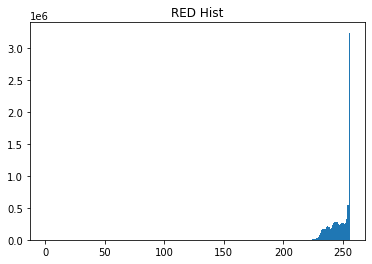

In [274]:
plt.title("RED Hist")
plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
plt.show()


3242945.0

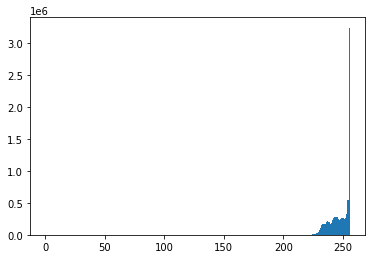

In [275]:
RED = plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
len(RED)
max(RED[0])

In [276]:
# Finding image mean
# image_mean1 = sum(count_R.*binslocation_R)/sum(count_R);

# image_mean = sum(RED[0]*RED[1])/sum(RED[0])

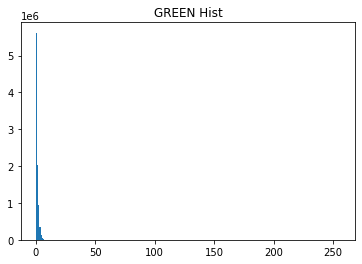

In [277]:
plt.title("GREEN Hist")
plt.hist(bgr_planes[1].ravel(),256,[0,256]) 
plt.show()


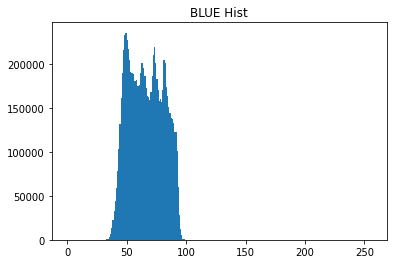

In [278]:
plt.title("BLUE Hist")
plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
plt.show()


Finding MAX vale in R,G,B

In [279]:
bgr_planes[2][0]
print(bgr_planes[2][0].shape)
print(bgr_planes[2].shape)

(2268,)
(4032, 2268)


In [280]:
bgr_planes[2]

array([[255, 254, 253, ..., 228, 226, 223],
       [255, 254, 254, ..., 230, 232, 233],
       [255, 255, 255, ..., 222, 219, 219],
       ...,
       [255, 255, 255, ..., 229, 231, 232],
       [254, 255, 255, ..., 229, 231, 231],
       [252, 255, 255, ..., 228, 230, 229]], dtype=uint8)

BLUE index 50 value : 226364.0


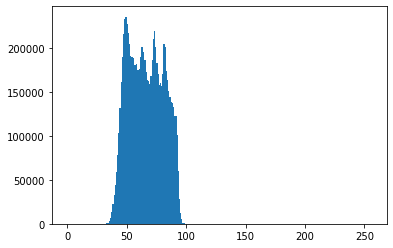

In [281]:
#BLUE BLUE[50] -> y value
BLUE = plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
len(BLUE)
# max(BLUE[0])
print("BLUE index 50 value : {}".format(BLUE[0][50]))

In [282]:




#  RED/RED + BLUE
img_m = max(RED[0])/(max(RED[0])+BLUE[0][50])
print("SPO2 : {}".format(img_m*100))

SPO2 : 93.4752424762395


In [283]:
RED_avg = sum(RED[0])/len(RED[0])
print(sum(RED[0])/len(RED[0]))

35721.0


In [284]:
BLUE_avg = sum(BLUE[0])/len(BLUE[0])

In [285]:
img_mm = RED_avg/(RED_avg+BLUE_avg)
print("SPO2 average : {}".format(img_mm*100))

SPO2 average : 50.0
